# This notebook trains the convolution neural network on MNIST dataset in multiple stages optimizing the network at each stage with added features like batch normalization, dropout:

In [122]:
# Uncomment and run the line below if you don't have keras and hvplot installed
# !pip install -q keras
!pip install hvplot

     |████████████████████████████████| 2.3MB 37.7MB/s 
     |████████████████████████████████| 4.0MB 53.0MB/s 
     |████████████████████████████████| 71kB 28.9MB/s 


In [149]:
import numpy as np
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten
from collections import Counter   
from keras.layers import Convolution2D
from keras.utils import np_utils
from keras.datasets import mnist
from random import sample 
import holoviews as hv 
import random

hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Load the MNIST dataset pre-available with keras package: This dataset contains the handwritten digits and their corresponding labels

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Show some meta information about the data and a sample image

There are 60000 number images in the training dataset
There are 10000 number images in the test dataset

Figure below shows, how a sample image look likes


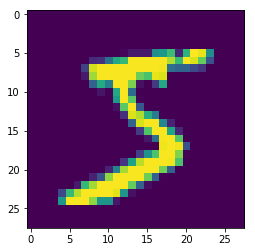

In [150]:
print("There are {} number images in the training dataset".format(X_train.shape[0]))
print("There are {} number images in the test dataset\n".format(X_test.shape[0]))
print("Figure below shows, how a sample image look likes")

# plt.plot(I,'o');
plt.imshow(X_train[0][:,:,0])

## Check the distribution of digits in train and test dataset. There does not see to be bias in the distribution of digits. It seems to be uniform

In [152]:
print("Distribution of digits in train data {}".format(dict(Counter(y_train))))
print("Distribution of digits in test data {}".format(dict(Counter(y_test))))

Distribution of digits in train data {5: 5421, 0: 5923, 4: 5842, 1: 6742, 9: 5949, 2: 5958, 3: 6131, 6: 5918, 7: 6265, 8: 5851}
Distribution of digits in test data {7: 1028, 2: 1032, 1: 1135, 0: 980, 4: 982, 9: 1009, 5: 892, 6: 958, 3: 1010, 8: 974}


## See some sample images, how they look in train and test data using Hvplot. Each image is of the size 28 X 28

In [0]:
random.seed(999) ## For reproducibility

:Layout
   .Image.Train.I      :Image   [x,y]   (z)
   .Image.Train.II     :Image   [x,y]   (z)
   .Image.Train.III    :Image   [x,y]   (z)
   .Image.Test.I       :Image   [x,y]   (z)
   .Image.Test.II      :Image   [x,y]   (z)
   .Image.Test.III     :Image   [x,y]   (z)
   .Image.Train.IV     :Image   [x,y]   (z)
   .Image.Train.V      :Image   [x,y]   (z)
   .Image.Train.VI     :Image   [x,y]   (z)
   .Image.Test.IV      :Image   [x,y]   (z)
   .Image.Test.V       :Image   [x,y]   (z)
   .Image.Test.VI      :Image   [x,y]   (z)
   .Image.Train.VII    :Image   [x,y]   (z)
   .Image.Train.VIII   :Image   [x,y]   (z)
   .Image.Train.IX     :Image   [x,y]   (z)
   .Image.Test.VII     :Image   [x,y]   (z)
   .Image.Test.VIII    :Image   [x,y]   (z)
   .Image.Test.IX      :Image   [x,y]   (z)
   .Image.Train.X      :Image   [x,y]   (z)
   .Image.Train.XI     :Image   [x,y]   (z)
   .Image.Train.XII    :Image   [x,y]   (z)
   .Image.Test.X       :Image   [x,y]   (z)
   .Image.Test.XI      :Image   [x,y]   (z)
   .Image.Test.XII     :Image   [x,y]   (z)
   .Image.Train.XIII   :Image   [x,y]   (z)
   .Image.Train.XIV    :Image   [x,y]   (z)
   .Image.Train.XV     :Image   [x,y]   (z)
   .Image.Test.XIII    :Image   [x,y]   (z)
   .Image.Test.XIV     :Image   [x,y]   (z)
   .Image.Test.XV      :Image   [x,y]   (z)
   .Image.Train.XVI    :Image   [x,y]   (z)
   .Image.Train.XVII   :Image   [x,y]   (z)
   .Image.Train.XVIII  :Image   [x,y]   (z)
   .Image.Test.XVI     :Image   [x,y]   (z)
   .Image.Test.XVII    :Image   [x,y]   (z)
   .Image.Test.XVIII   :Image   [x,y]   (z)
   .Image.Train.XIX    :Image   [x,y]   (z)
   .Image.Train.XX     :Image   [x,y]   (z)
   .Image.Train.XXI    :Image   [x,y]   (z)
   .Image.Test.XIX     :Image   [x,y]   (z)
   .Image.Test.XX      :Image   [x,y]   (z)
   .Image.Test.XXI     :Image   [x,y]   (z)
   .Image.Train.XXII   :Image   [x,y]   (z)
   .Image.Train.XXIII  :Image   [x,y]   (z)
   .Image.Train.XXIV   :Image   [x,y]   (z)
   .Image.Test.XXII    :Image   [x,y]   (z)
   .Image.Test.XXIII   :Image   [x,y]   (z)
   .Image.Test.XXIV    :Image   [x,y]   (z)
   .Image.Train.XXV    :Image   [x,y]   (z)
   .Image.Train.XXVI   :Image   [x,y]   (z)
   .Image.Train.XXVII  :Image   [x,y]   (z)
   .Image.Test.XXV     :Image   [x,y]   (z)
   .Image.Test.XXVI    :Image   [x,y]   (z)
   .Image.Test.XXVII   :Image   [x,y]   (z)
   .Image.Train.XXVIII :Image   [x,y]   (z)
   .Image.Train.XXIX   :Image   [x,y]   (z)
   .Image.Train.XXX    :Image   [x,y]   (z)
   .Image.Test.XXVIII  :Image   [x,y]   (z)
   .Image.Test.XXIX    :Image   [x,y]   (z)
   .Image.Test.XXX     :Image   [x,y]   (z)
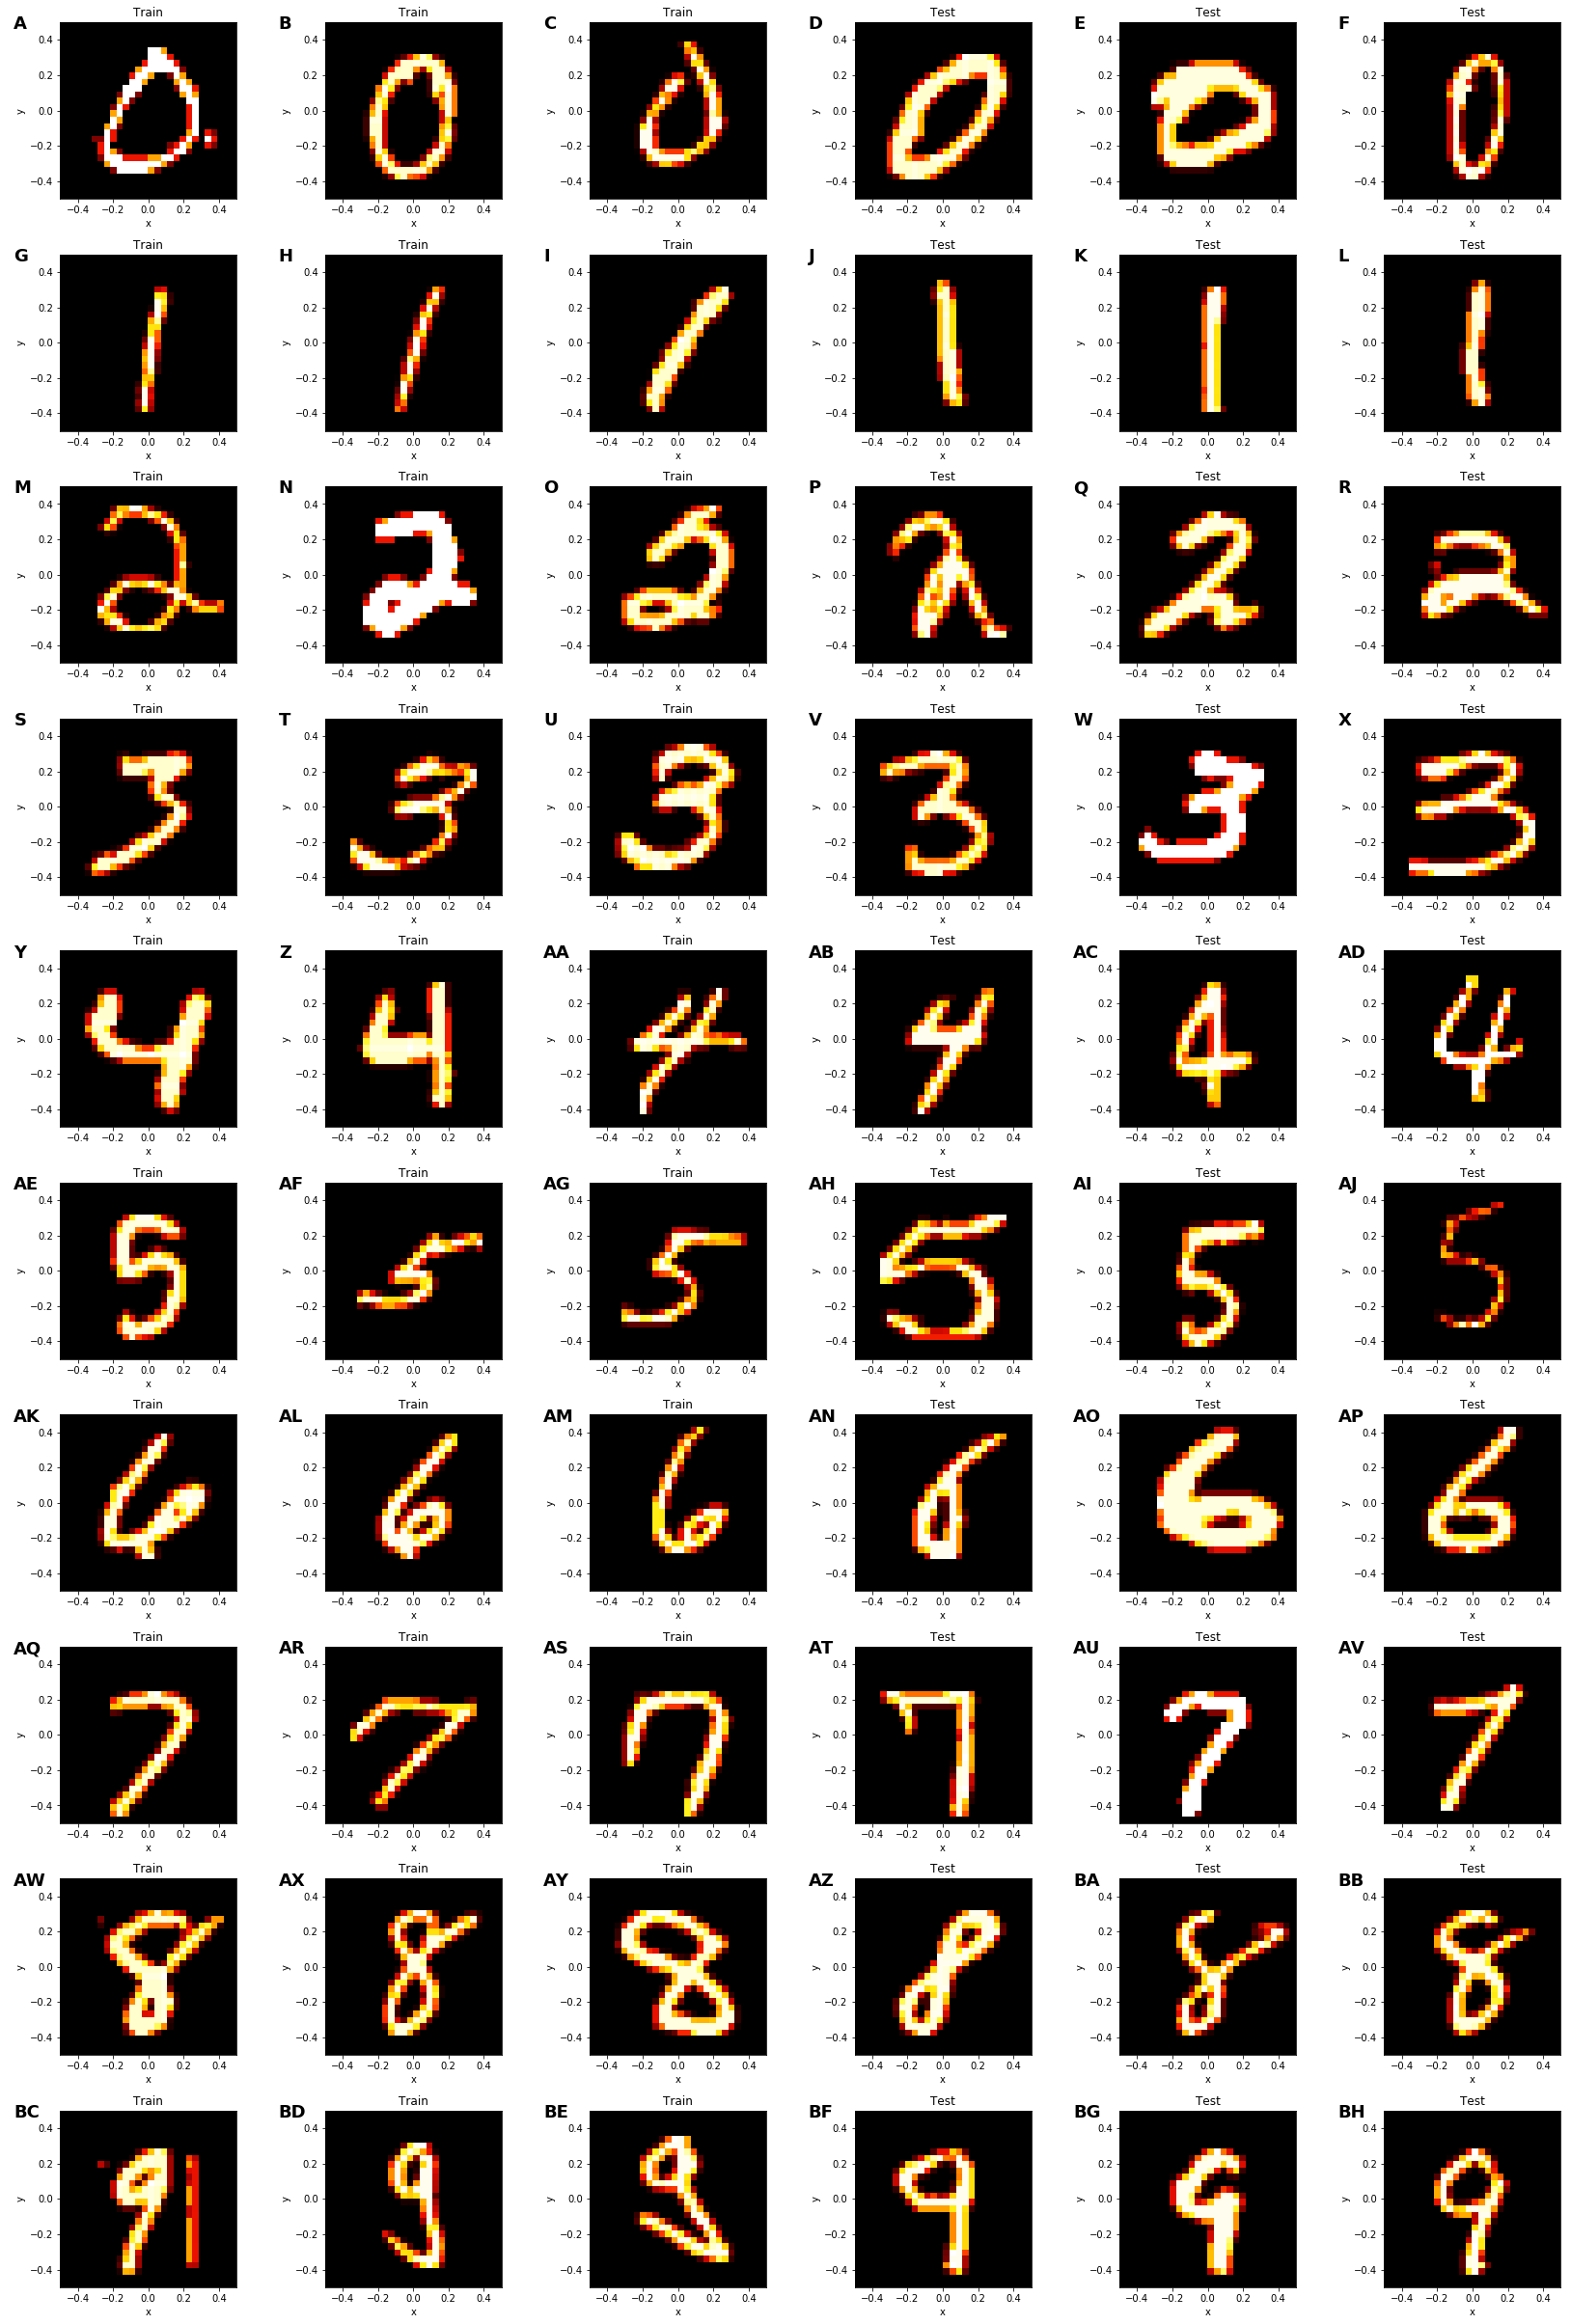

In [154]:
nums=list(range(0,10))
index_list_train=[]
# Take 3 sample randomly for each digit in train and test
for i in nums:  
  index_list_train.append(sample(list(np.where(y_train ==i)[0]),3))

index_list_test=[]
for i in nums:  
  index_list_test.append(sample(list(np.where(y_test ==i)[0]),3))  


train_test_ind=[]
for i in range(0,10):
  a=[]
  for item in index_list_train[i]:
    a.append(hv.Image(X_train[item],label="Train"))
  b=[]
  for item in index_list_test[i]:
    b.append(hv.Image(X_test[item],label="Test"))
  train_test_ind.append(a+b)

train_test_ind_flat=[item for sublist in train_test_ind for item in sublist]

img=train_test_ind_flat[0]
for i in range(1,len(train_test_ind_flat)):
  img=img+train_test_ind_flat[i]
  
img.cols(6) # A very cool way to plot grids of images. Very complex code to do the same in matplotlib

## Reshape the data to have images of size 28X 28 with 1 channel

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Conver the datatype and standardize the images

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
X_train1 = X_train.reshape(X_train.shape[0], 28, 28)
X_test1 = X_test.reshape(X_test.shape[0], 28, 28)

In [237]:
len(a)

3

## Visulaizing train and test images after standardization. What has really changed here?

:Layout
   .Image.Train.I      :Image   [x,y]   (z)
   .Image.Train.II     :Image   [x,y]   (z)
   .Image.Train.III    :Image   [x,y]   (z)
   .Image.Test.I       :Image   [x,y]   (z)
   .Image.Test.II      :Image   [x,y]   (z)
   .Image.Test.III     :Image   [x,y]   (z)
   .Image.Train.IV     :Image   [x,y]   (z)
   .Image.Train.V      :Image   [x,y]   (z)
   .Image.Train.VI     :Image   [x,y]   (z)
   .Image.Test.IV      :Image   [x,y]   (z)
   .Image.Test.V       :Image   [x,y]   (z)
   .Image.Test.VI      :Image   [x,y]   (z)
   .Image.Train.VII    :Image   [x,y]   (z)
   .Image.Train.VIII   :Image   [x,y]   (z)
   .Image.Train.IX     :Image   [x,y]   (z)
   .Image.Test.VII     :Image   [x,y]   (z)
   .Image.Test.VIII    :Image   [x,y]   (z)
   .Image.Test.IX      :Image   [x,y]   (z)
   .Image.Train.X      :Image   [x,y]   (z)
   .Image.Train.XI     :Image   [x,y]   (z)
   .Image.Train.XII    :Image   [x,y]   (z)
   .Image.Test.X       :Image   [x,y]   (z)
   .Image.Test.XI      :Image   [x,y]   (z)
   .Image.Test.XII     :Image   [x,y]   (z)
   .Image.Train.XIII   :Image   [x,y]   (z)
   .Image.Train.XIV    :Image   [x,y]   (z)
   .Image.Train.XV     :Image   [x,y]   (z)
   .Image.Test.XIII    :Image   [x,y]   (z)
   .Image.Test.XIV     :Image   [x,y]   (z)
   .Image.Test.XV      :Image   [x,y]   (z)
   .Image.Train.XVI    :Image   [x,y]   (z)
   .Image.Train.XVII   :Image   [x,y]   (z)
   .Image.Train.XVIII  :Image   [x,y]   (z)
   .Image.Test.XVI     :Image   [x,y]   (z)
   .Image.Test.XVII    :Image   [x,y]   (z)
   .Image.Test.XVIII   :Image   [x,y]   (z)
   .Image.Train.XIX    :Image   [x,y]   (z)
   .Image.Train.XX     :Image   [x,y]   (z)
   .Image.Train.XXI    :Image   [x,y]   (z)
   .Image.Test.XIX     :Image   [x,y]   (z)
   .Image.Test.XX      :Image   [x,y]   (z)
   .Image.Test.XXI     :Image   [x,y]   (z)
   .Image.Train.XXII   :Image   [x,y]   (z)
   .Image.Train.XXIII  :Image   [x,y]   (z)
   .Image.Train.XXIV   :Image   [x,y]   (z)
   .Image.Test.XXII    :Image   [x,y]   (z)
   .Image.Test.XXIII   :Image   [x,y]   (z)
   .Image.Test.XXIV    :Image   [x,y]   (z)
   .Image.Train.XXV    :Image   [x,y]   (z)
   .Image.Train.XXVI   :Image   [x,y]   (z)
   .Image.Train.XXVII  :Image   [x,y]   (z)
   .Image.Test.XXV     :Image   [x,y]   (z)
   .Image.Test.XXVI    :Image   [x,y]   (z)
   .Image.Test.XXVII   :Image   [x,y]   (z)
   .Image.Train.XXVIII :Image   [x,y]   (z)
   .Image.Train.XXIX   :Image   [x,y]   (z)
   .Image.Train.XXX    :Image   [x,y]   (z)
   .Image.Test.XXVIII  :Image   [x,y]   (z)
   .Image.Test.XXIX    :Image   [x,y]   (z)
   .Image.Test.XXX     :Image   [x,y]   (z)
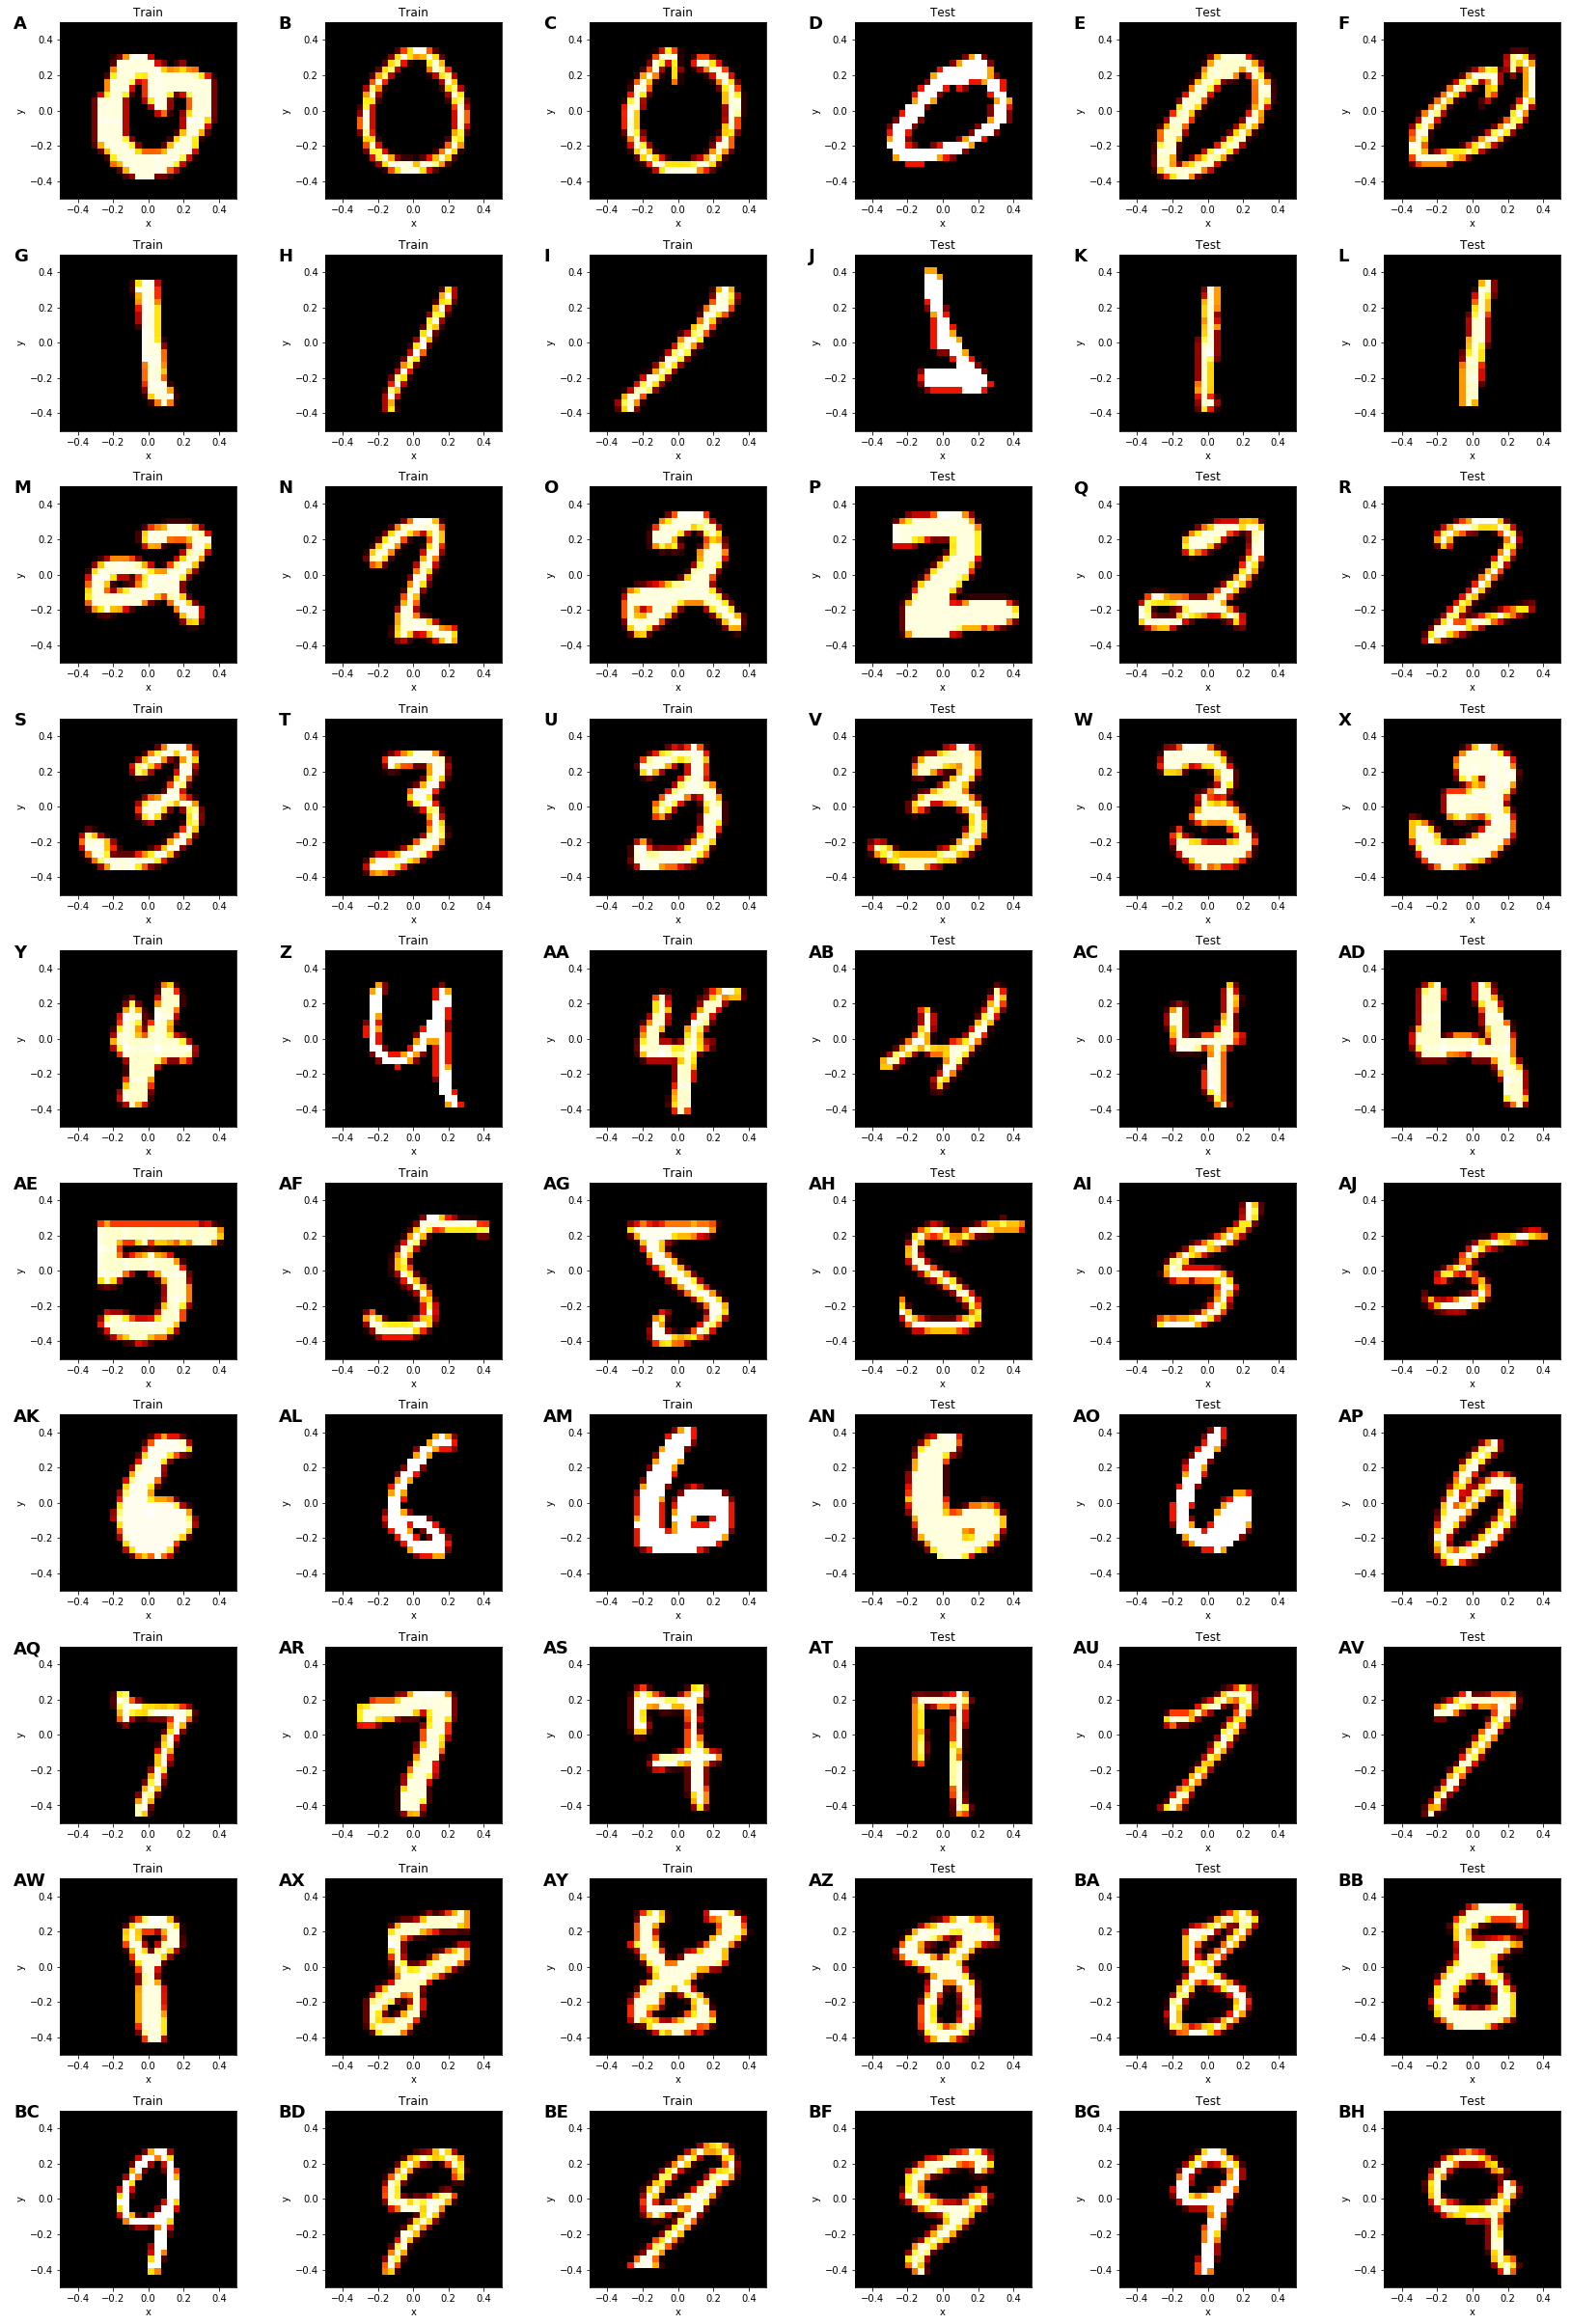

In [161]:
nums=list(range(0,10))
index_list_train=[]
# Take 3 sample randomly for each digit in train and test
for i in nums:  
  index_list_train.append(sample(list(np.where(y_train ==i)[0]),3))

index_list_test=[]
for i in nums:  
  index_list_test.append(sample(list(np.where(y_test ==i)[0]),3))  

train_test_ind=[]
for i in range(0,10):
  a=[]
  for item in index_list_train[i]:
    a.append(hv.Image(X_train1[item],label="Train"))
  b=[]
  for item in index_list_test[i]:
    b.append(hv.Image(X_test1[item],label="Test"))
  train_test_ind.append(a+b)

train_test_ind_flat=[item for sublist in train_test_ind for item in sublist]

img=train_test_ind_flat[0]
for i in range(1,len(train_test_ind_flat)):
  img=img+train_test_ind_flat[i]
  
img.cols(6) # A very cool way to plot grids of images. Very complex code to do the same in matplotlib

## Convert 1-dimensional class of digits to 10 dimentional where the position with digit will be 1 and zero everywhere else

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [189]:
optimizers.

<module 'keras.optimizers' from '/usr/local/lib/python3.6/dist-packages/keras/optimizers.py'>

## Designing the network and checking the performance and issues

## Network Design 1: This network contains around 68K paprameters.  Ideally network should not be designed in this way. The problem with this design is we are not letting the receptive field build, we are using big 26X 26 convolution which consumes huge number of parameters

In [204]:
from keras.layers import Activation
from keras import optimizers
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
# sgd = optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_16 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [205]:
# model.fit(X_train, Y_train, batch_size=100, nb_epoch=20, verbose=1,validation_data=(X_test, Y_test))
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.1845 - acc: 0.9473 - val_loss: 0.0939 - val_acc: 0.9737
Epoch 2/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0700 - acc: 0.9782 - val_loss: 0.0742 - val_acc: 0.9775
Epoch 3/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0536 - acc: 0.9830 - val_loss: 0.0705 - val_acc: 0.9786
Epoch 4/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0436 - acc: 0.9864 - val_loss: 0.0770 - val_acc: 0.9780
Epoch 5/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0344 - acc: 0.9889 - val_loss: 0.0809 - val_acc: 0.9791
Epoch 6/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0277 - acc: 0.9910 - val_loss: 0.0788 - val_acc: 0.9775
Epoch 7/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0227 - acc: 0.9927 - val_loss: 0.0757 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

In [202]:
print(score)

[0.1455221017422471, 0.9764]


In [0]:
y_pred = model.predict(X_test)

In [0]:
def return_incorrect_image_object():
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)
  num_incorrect_train=len(np.where(y_train!=np.argmax(y_pred_train, axis=1))[0])
  num_incorrect_test=len(np.where(y_test!=np.argmax(y_pred_test, axis=1))[0])
  incorrect_test_index=sample(list(np.where(y_test!=np.argmax(y_pred_test, axis=1))[0]),20)
  incorrect_train_index=sample(list(np.where(y_train!=np.argmax(y_pred_train, axis=1))[0]),20)
  images_test=[]
  for index in incorrect_test_index:
    image_header='Prediction ='+str(np.argmax(y_pred_test, axis=1)[index])+" Correct Label="+str(y_test[index])
    images_test.append(hv.Image(X_test[index],label=image_header))

  images_train=[]  
  for index in incorrect_train_index:
    image_header='Prediction ='+str(np.argmax(y_pred_train, axis=1)[index])+" Correct Label="+str(y_train[index])
    images_train.append(hv.Image(X_train[index],label=image_header))  

  img_test=images_test[0]
  for i in range(1,len(images_test)):
    img_test=img_test+images_test[i]  

  img_train=images_train[0]
  for i in range(1,len(images_train)):
    img_train=img_train+images_train[i]
  return img_train,img_test,num_incorrect_train,num_incorrect_test

In [0]:
img_train,img_test,num_incorrect_train,num_incorrect_test=return_incorrect_image_object()

## Show incorrect samples-Train[Looking into visulas of this it looks like there is room for network to still learn. As it has not learnt to recognize few digits properly]

Total number of incorrect training cases:129/60000
Showing some exaples:


:Layout
   .Image.Prediction_equals_3_Correct_Label_equals_0     :Image   [x,y]   (z)
   .Image.Prediction_equals_1_Correct_Label_equals_7     :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_7.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_5.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_8.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_5.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_8.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_1.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_7.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_1.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_5     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_9.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_8.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_8_Correct_Label_equals_7     :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_8.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_0     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_9.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_5.III :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_8.III :Image   [x,y]   (z)
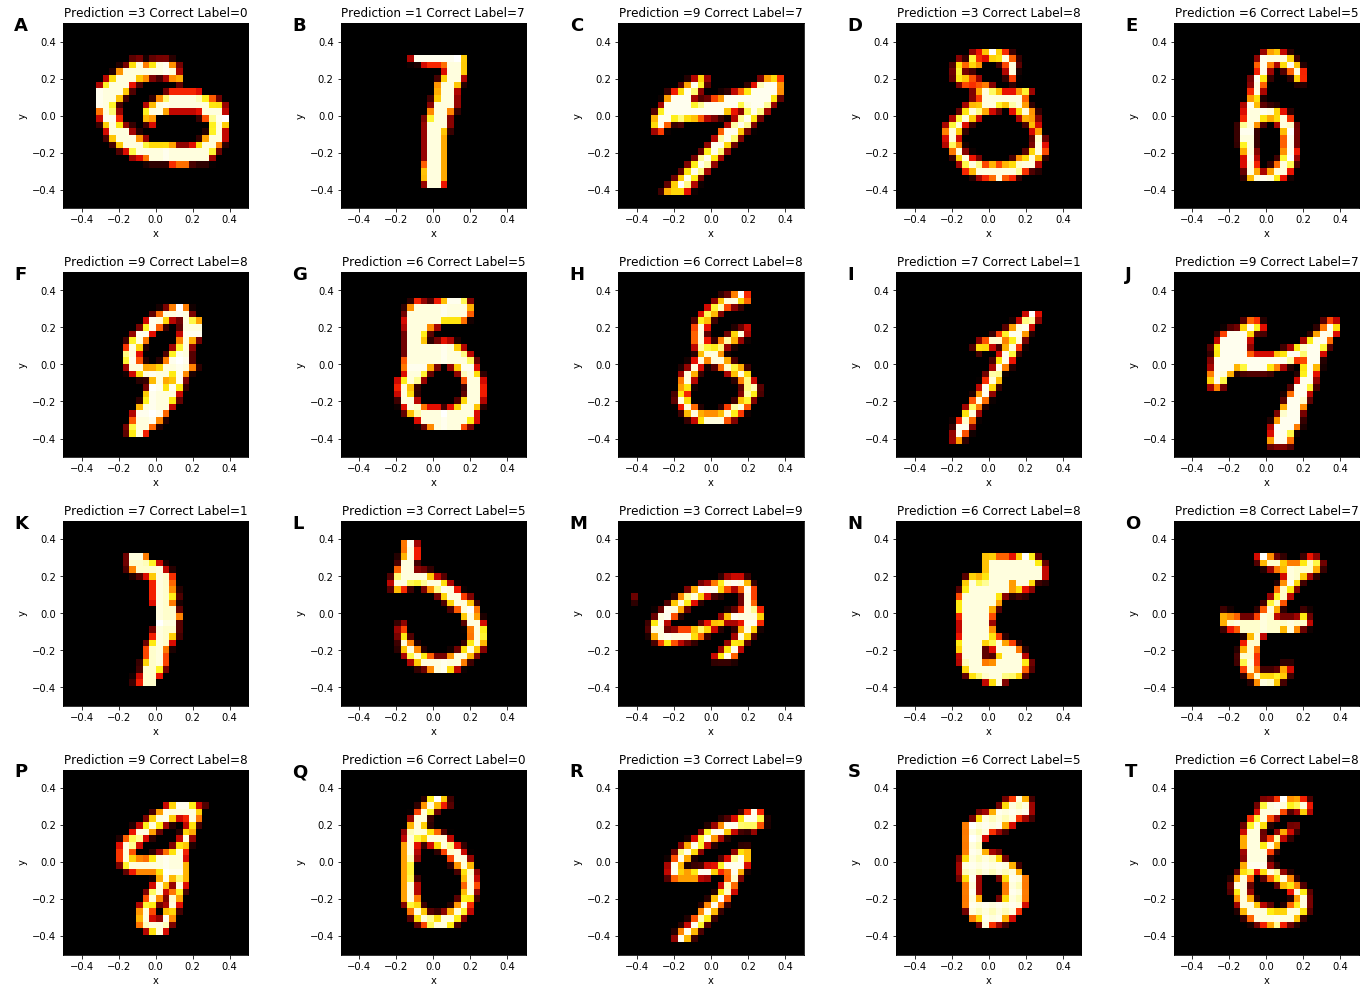

In [268]:
print("Total number of incorrect training cases:{}".format(str(num_incorrect_train)+"/"+str(X_train.shape[0])))
print("Showing some exaples:")
img_train.cols(5)

## Show incorrect samples-Test

Total number of incorrect test cases:185/10000
Showing some exaples:


:Layout
   .Image.Prediction_equals_2_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_2_Correct_Label_equals_1     :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_3     :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_2     :Image   [x,y]   (z)
   .Image.Prediction_equals_8_Correct_Label_equals_2     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_7.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_2_Correct_Label_equals_7     :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_9.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_8_Correct_Label_equals_0     :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_9.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_5     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_5     :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_4     :Image   [x,y]   (z)
   .Image.Prediction_equals_2_Correct_Label_equals_3     :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_9     :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_1     :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_9.III :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_7.II  :Image   [x,y]   (z)
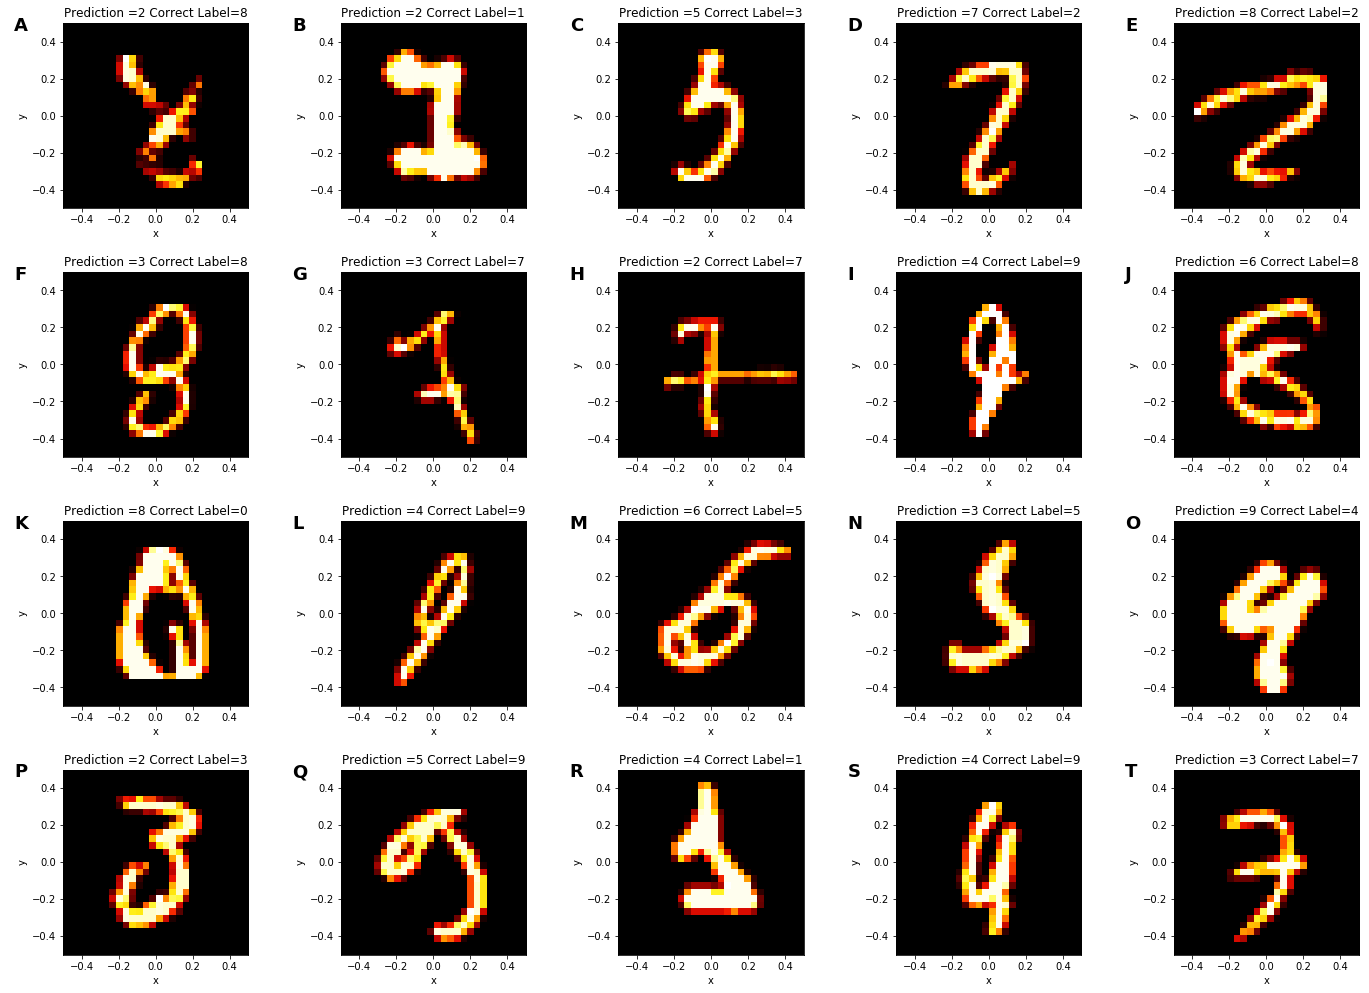

In [269]:
print("Total number of incorrect test cases:{}".format(str(num_incorrect_test)+"/"+str(X_test.shape[0])))
print("Showing some exaples:")
img_test.cols(5)

## Network Design 2: Adding more convolution layers and max pooling

In [284]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(10, 3, 3, activation='relu')) # 24
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11

model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(Convolution2D(20, 3, 3, activation='relu')) # 7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 22, 22, 20)        1820      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 11, 11, 10)        210       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 9, 9, 10)          910       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 7, 7, 20)          1820      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

In [287]:
!ls

sample_data			  weights-improvement-03-0.99.hdf5
weights.best.hdf5		  weights-improvement-05-0.99.hdf5
weights-improvement-01-0.99.hdf5  weights-improvement-07-0.99.hdf5


### Save best model in a file

In [286]:
# model.fit(X_train, Y_train, batch_size=100, nb_epoch=20, verbose=1,validation_data=(X_test, Y_test))
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test),callbacks=callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.2296 - acc: 0.9294 - val_loss: 0.0720 - val_acc: 0.9771

Epoch 00001: val_acc improved from -inf to 0.97710, saving model to weights.best.hdf5
Epoch 2/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0786 - acc: 0.9753 - val_loss: 0.0696 - val_acc: 0.9792

Epoch 00002: val_acc improved from 0.97710 to 0.97920, saving model to weights.best.hdf5
Epoch 3/10
60000/60000 [==============================] - 11s 192us/step - loss: 0.0578 - acc: 0.9819 - val_loss: 0.0493 - val_acc: 0.9838

Epoch 00003: val_acc improved from 0.97920 to 0.98380, saving model to weights.best.hdf5
Epoch 4/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0472 - acc: 0.9851 - val_loss: 0.0436 - val_acc: 0.9858

Epoch 00004: val_acc improved from 0.98380 to 0.98580, saving model to weights.best.hdf5
Epoch 5/10
60000/60000 [=============

In [0]:
# load weights
model.load_weights("weights.best.hdf5")

In [289]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03545073150318349, 0.9895]


In [0]:
img_train,img_test,num_incorrect_train,num_incorrect_test=return_incorrect_image_object()

Total number of incorrect training cases:328/60000
Showing some exaples:


:Layout
   .Image.Prediction_equals_3_Correct_Label_equals_2.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_6.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_6.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_3     :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_5     :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_6.III :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_4.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_0_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_7     :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_2.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_1_Correct_Label_equals_7     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_2.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_8_Correct_Label_equals_2     :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_4.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_2_Correct_Label_equals_7     :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_6.IV  :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_2.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_8_Correct_Label_equals_6     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_2.III :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_6.V   :Image   [x,y]   (z)
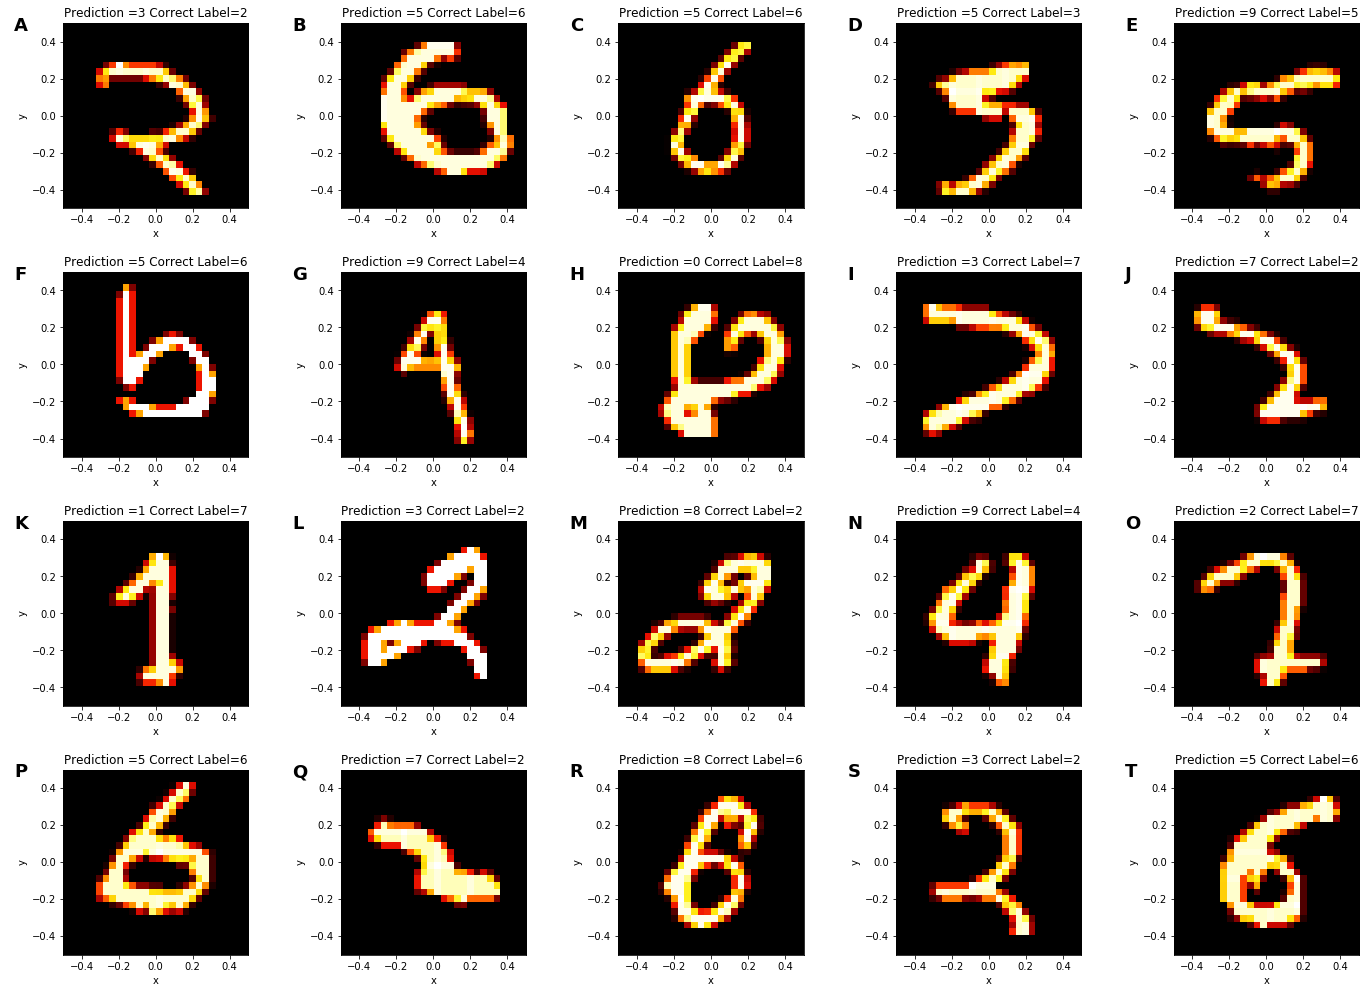

In [291]:
print("Total number of incorrect training cases:{}".format(str(num_incorrect_train)+"/"+str(X_train.shape[0])))
print("Showing some exaples:")
img_train.cols(5)

Total number of incorrect test cases:105/10000
Showing some exaples:


:Layout
   .Image.Prediction_equals_8_Correct_Label_equals_6.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_0     :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_6     :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_4     :Image   [x,y]   (z)
   .Image.Prediction_equals_2_Correct_Label_equals_9     :Image   [x,y]   (z)
   .Image.Prediction_equals_0_Correct_Label_equals_6     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_7     :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_9.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_9.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_1_Correct_Label_equals_7.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_4     :Image   [x,y]   (z)
   .Image.Prediction_equals_1_Correct_Label_equals_7.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_8_Correct_Label_equals_6.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_9.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_9.III :Image   [x,y]   (z)
   .Image.Prediction_equals_0_Correct_Label_equals_5     :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_9.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_6     :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_9.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_9.II  :Image   [x,y]   (z)
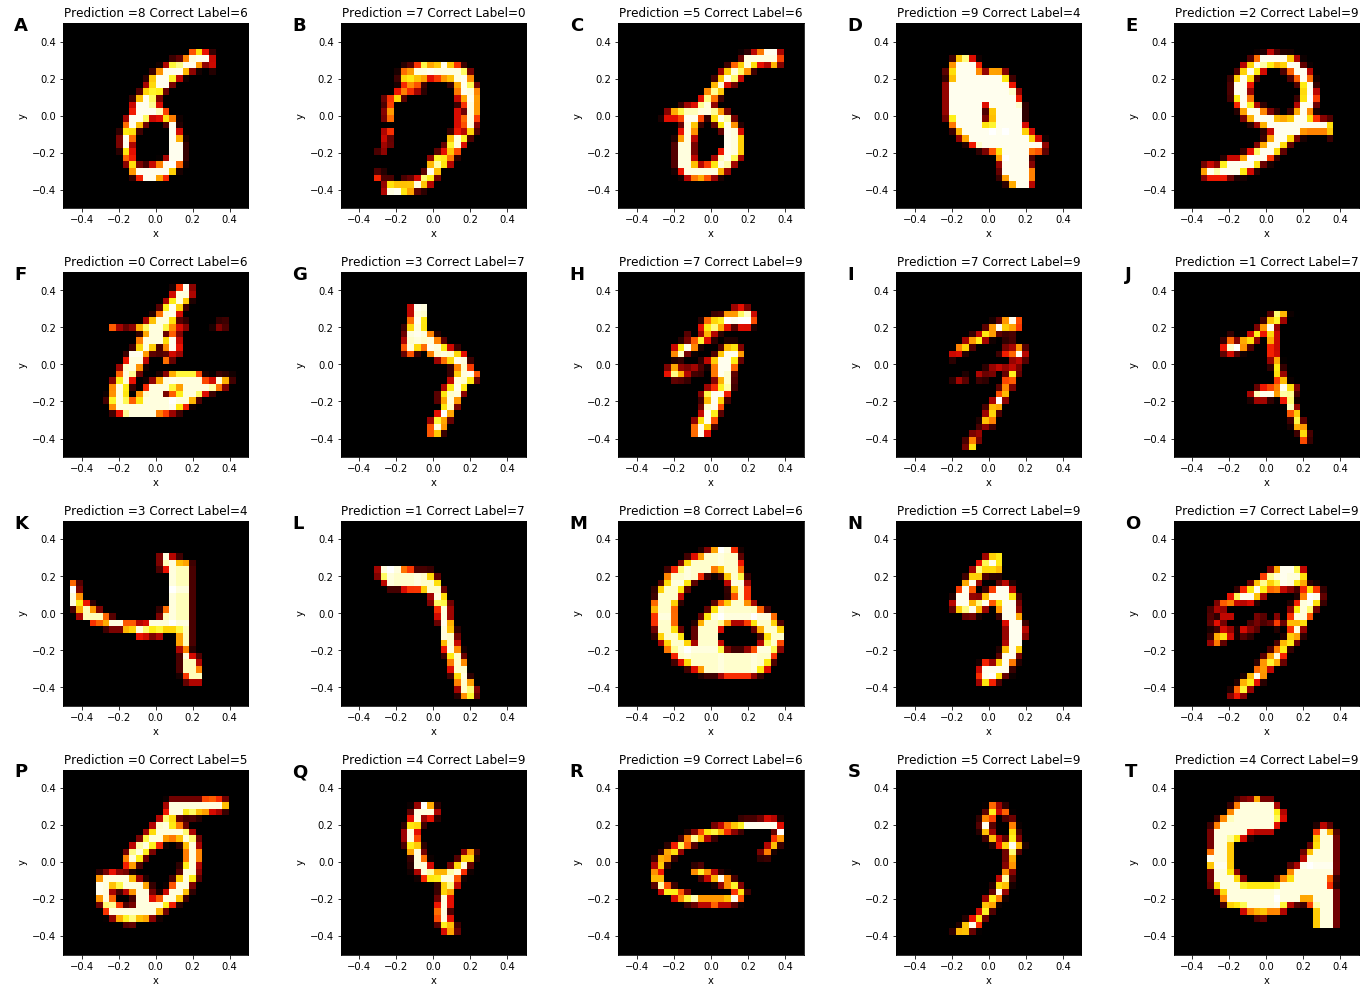

In [292]:
print("Total number of incorrect test cases:{}".format(str(num_incorrect_test)+"/"+str(X_test.shape[0])))
print("Showing some exaples:")
img_test.cols(5)

## Network Design 3:  Adding batch normialization which has equalization effect of edges and gradients. This improves val accriacy to 99.2%

In [309]:
from keras.layers import Activation
from keras.layers import Dropout, BatchNormalization
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_24 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 32)        0         
__________

In [310]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test),callbacks=callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 419us/step - loss: 0.1271 - acc: 0.9604 - val_loss: 0.0632 - val_acc: 0.9795

Epoch 00001: val_acc improved from -inf to 0.97950, saving model to weights.best.hdf5
Epoch 2/10
60000/60000 [==============================] - 21s 354us/step - loss: 0.0438 - acc: 0.9866 - val_loss: 0.0359 - val_acc: 0.9883

Epoch 00002: val_acc improved from 0.97950 to 0.98830, saving model to weights.best.hdf5
Epoch 3/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.0366 - acc: 0.9885 - val_loss: 0.0361 - val_acc: 0.9891

Epoch 00003: val_acc improved from 0.98830 to 0.98910, saving model to weights.best.hdf5
Epoch 4/10
60000/60000 [==============================] - 22s 359us/step - loss: 0.0284 - acc: 0.9909 - val_loss: 0.0320 - val_acc: 0.9900

Epoch 00004: val_acc improved from 0.98910 to 0.99000, saving model to weights.best.hdf5
Epoch 5/10
60000/60000 [=============

In [0]:
# load weights
model.load_weights("weights.best.hdf5")

In [312]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.030229901349010834, 0.992]


In [0]:
img_train,img_test,num_incorrect_train,num_incorrect_test=return_incorrect_image_object()

# Showing sample test images which are incorrectly classified

Total number of incorrect training cases:180/60000
Showing some exaples:


:Layout
   .Image.Prediction_equals_6_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_0_Correct_Label_equals_6     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_5.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_5.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_5.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_5.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_9.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_1.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_5.III :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_1.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_0_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_2.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_8_Correct_Label_equals_3     :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_9.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_1.III :Image   [x,y]   (z)
   .Image.Prediction_equals_1_Correct_Label_equals_7     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_2.II  :Image   [x,y]   (z)
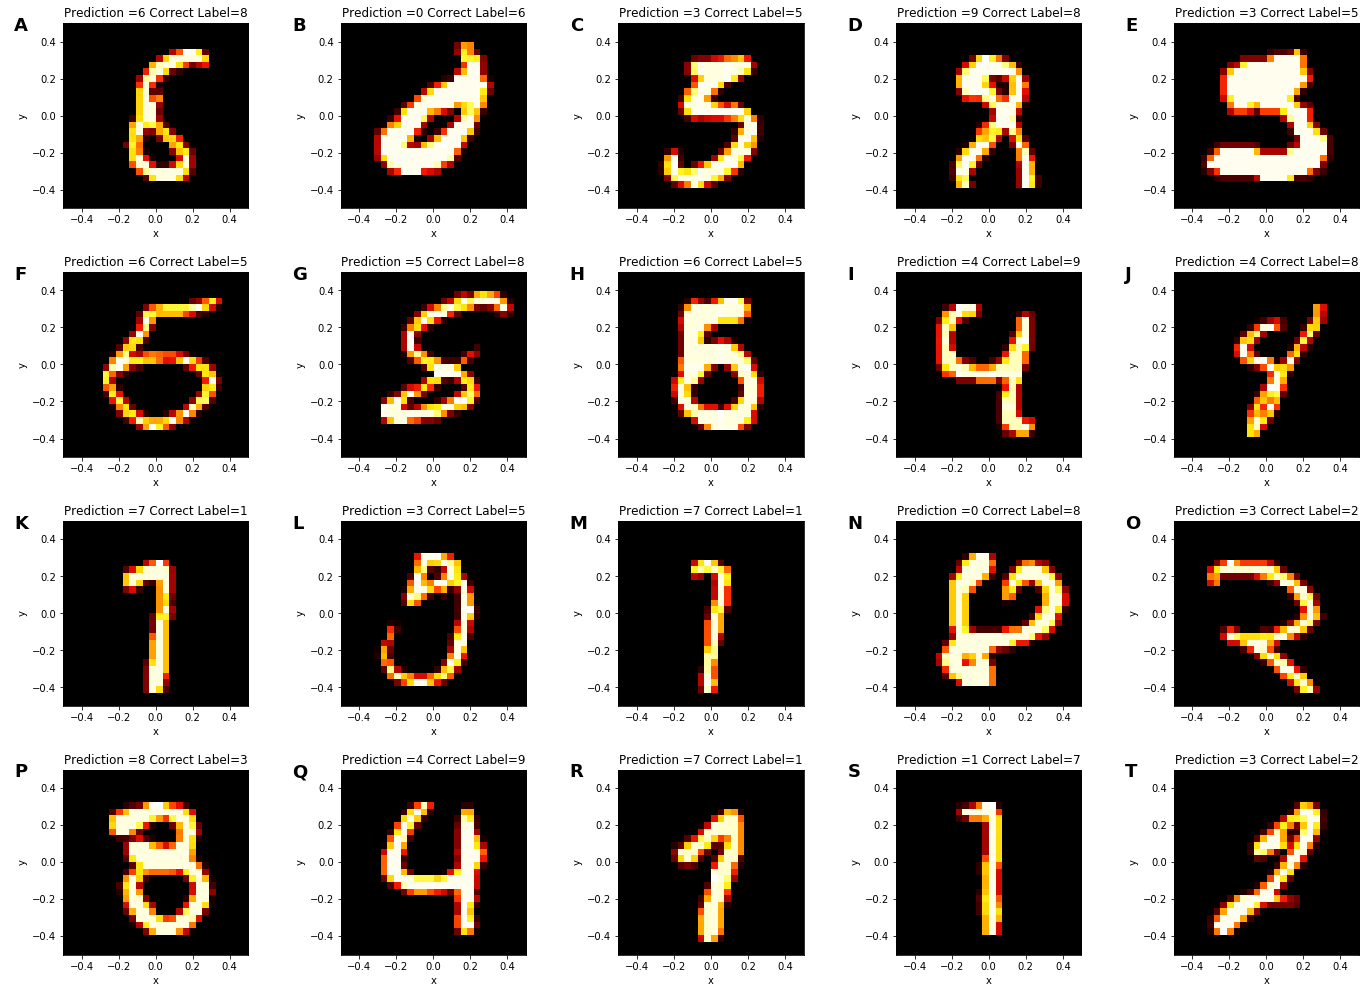

In [302]:
print("Total number of incorrect training cases:{}".format(str(num_incorrect_train)+"/"+str(X_train.shape[0])))
print("Showing some exaples:")
img_train.cols(5)

## Network Design 4: In the above network there is overfitting. Adding dropout

In [325]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(20, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_71 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 24, 24, 20)        1820      
_________________________________________________________________
batch_normalization_72 (Batc (None, 24, 24, 20)        80        
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 22, 22, 32)        5792      
_________________________________________________________________
batch_normalization_73 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_13 (Dropout)         (None, 22, 22, 32)        0         
__________

In [326]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1,validation_data=(X_test, Y_test),callbacks=callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 307us/step - loss: 0.2034 - acc: 0.9373 - val_loss: 0.0561 - val_acc: 0.9804

Epoch 00001: val_acc improved from -inf to 0.98040, saving model to weights.best.hdf5
Epoch 2/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0583 - acc: 0.9817 - val_loss: 0.0393 - val_acc: 0.9866

Epoch 00002: val_acc improved from 0.98040 to 0.98660, saving model to weights.best.hdf5
Epoch 3/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0447 - acc: 0.9860 - val_loss: 0.0445 - val_acc: 0.9854

Epoch 00003: val_acc did not improve from 0.98660
Epoch 4/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0394 - acc: 0.9877 - val_loss: 0.0310 - val_acc: 0.9905

Epoch 00004: val_acc improved from 0.98660 to 0.99050, saving model to weights.best.hdf5
Epoch 5/20
60000/60000 [==============================] - 12s 203us/step - l

In [0]:
# load weights
model.load_weights("weights.best.hdf5")

In [328]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.026152654345189878, 0.9932]


In [0]:
img_train,img_test,num_incorrect_train,num_incorrect_test=return_incorrect_image_object()

# Showing sample test images which are incorrectly classified: It can be seen that the images which our model is not able to classifiy correctly are not of so good quality.

Total number of incorrect test cases:68/10000
Showing some exaples:


:Layout
   .Image.Prediction_equals_6_Correct_Label_equals_5.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_7_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_1_Correct_Label_equals_7.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_9.I   :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_2     :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_9     :Image   [x,y]   (z)
   .Image.Prediction_equals_0_Correct_Label_equals_6     :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_9.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_9.III :Image   [x,y]   (z)
   .Image.Prediction_equals_1_Correct_Label_equals_3     :Image   [x,y]   (z)
   .Image.Prediction_equals_3_Correct_Label_equals_5     :Image   [x,y]   (z)
   .Image.Prediction_equals_1_Correct_Label_equals_6     :Image   [x,y]   (z)
   .Image.Prediction_equals_4_Correct_Label_equals_9.IV  :Image   [x,y]   (z)
   .Image.Prediction_equals_1_Correct_Label_equals_7.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_6_Correct_Label_equals_5.II  :Image   [x,y]   (z)
   .Image.Prediction_equals_5_Correct_Label_equals_9     :Image   [x,y]   (z)
   .Image.Prediction_equals_9_Correct_Label_equals_8     :Image   [x,y]   (z)
   .Image.Prediction_equals_1_Correct_Label_equals_7.III :Image   [x,y]   (z)
   .Image.Prediction_equals_2_Correct_Label_equals_8     :Image   [x,y]   (z)
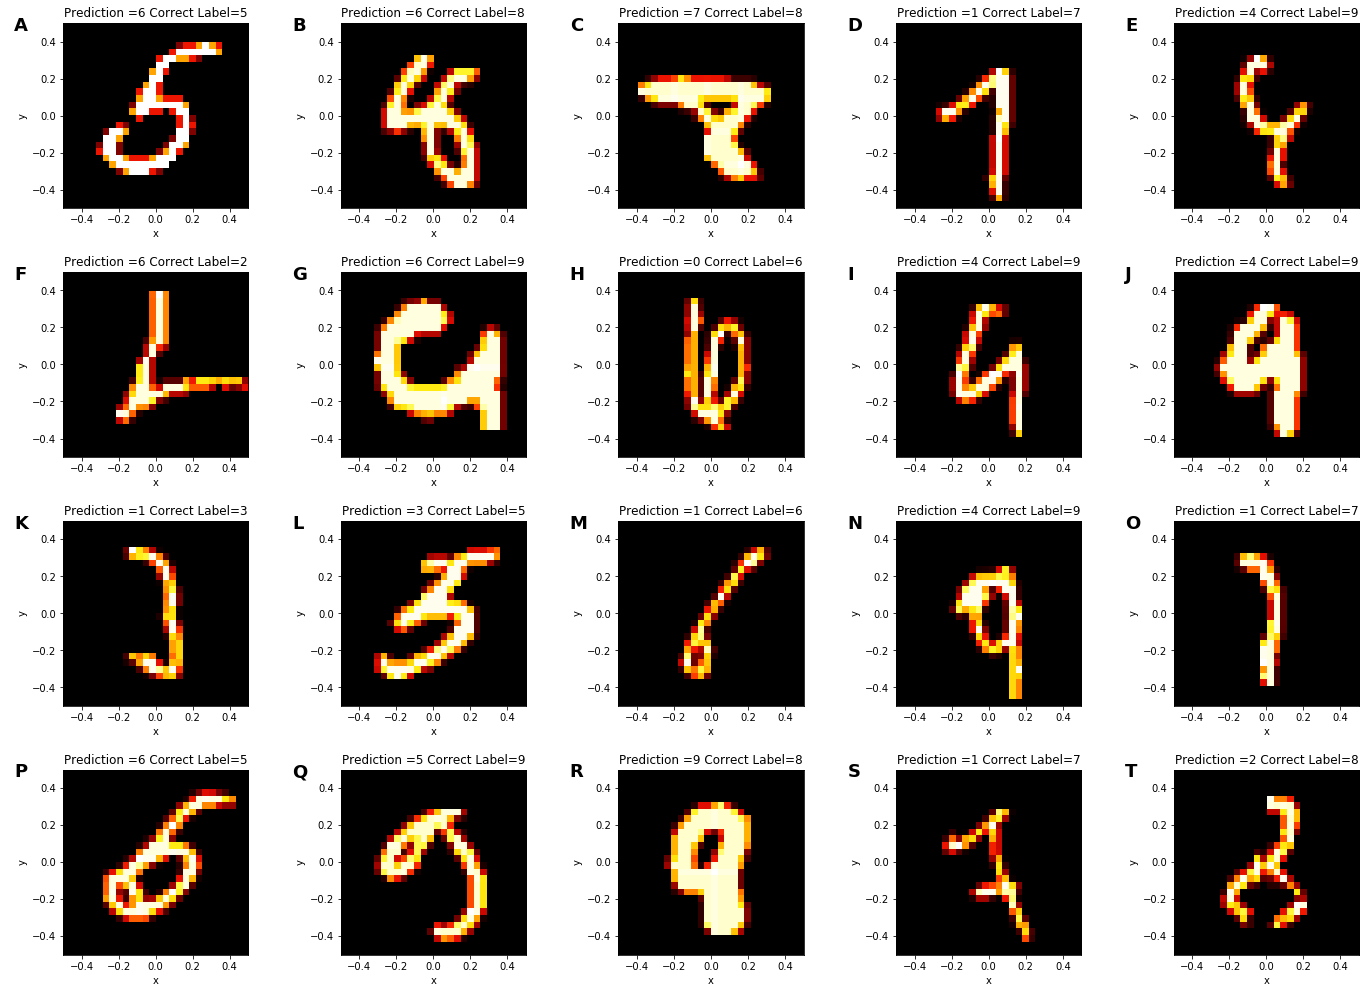

In [332]:
print("Total number of incorrect test cases:{}".format(str(num_incorrect_test)+"/"+str(X_test.shape[0])))
print("Showing some exaples:")
img_test.cols(5)